In [103]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [104]:
def f(x):
    return 3 * x[:,0] + 0.4 * x[:, 1] + np.random.normal(0, 4, len(x[:, 0]))

In [105]:
pho = np.arange(0, 1.1, 0.1)
mean = [0, 0]

In [106]:
#--------
# Model 1
#--------

mse_mod1 = np.zeros(len(pho))

for i in range(0, len(pho)):
    cov = [[1, pho[i]], [pho[i], 1]]
    mse = np.zeros(20)

    for j in range(0, 20):
        X_train = np.random.multivariate_normal(mean, cov, 30)
        y_train = f(X_train)

        X_test = np.random.multivariate_normal(mean, cov, 100000)
        y_test = f(X_test)

        lm = LinearRegression().fit(X_train*0, y_train)
        y_hat = lm.predict(X_test)

        mse[j] = np.mean((y_test - y_hat)**2)

    mse_mod1[i] = np.mean(mse)

In [121]:
#--------
# Model 2
#--------

mse_mod2 = np.zeros(len(pho))

for i in range(0, len(pho)):
    cov = [[1, pho[i]], [pho[i], 1]]
    mse = np.zeros(20)

    for j in range(0, 20):
        X_train = np.random.multivariate_normal(mean, cov, 30)
        y_train = f(X_train)

        X_test = np.random.multivariate_normal(mean, cov, 100000)
        y_test = f(X_test)

        lm = LinearRegression().fit(X_train[:, 1].reshape(-1, 1), y_train)
        y_hat = lm.predict(X_test[:, 1].reshape(-1, 1))

        mse[j] = np.mean((y_test - y_hat)**2)

    mse_mod2[i] = np.mean(mse)

In [122]:
#--------
# Model 3
#--------

mse_mod3 = np.zeros(len(pho))

for i in range(0, len(pho)):
    cov = [[1, pho[i]], [pho[i], 1]]
    mse = np.zeros(20)

    for j in range(0, 20):
        X_train = np.random.multivariate_normal(mean, cov, 30)
        y_train = f(X_train)

        X_test = np.random.multivariate_normal(mean, cov, 100000)
        y_test = f(X_test)

        lm = LinearRegression().fit(X_train[:, 0].reshape(-1, 1), y_train)
        y_hat = lm.predict(X_test[:, 0].reshape(-1, 1))

        mse[j] = np.mean((y_test - y_hat)**2)

    mse_mod3[i] = np.mean(mse)

In [123]:
#--------
# Model 4
#--------

mse_mod4 = np.zeros(len(pho))

for i in range(0, len(pho)):
    cov = [[1, pho[i]], [pho[i], 1]]
    mse = np.zeros(20)

    for j in range(0, 20):
        X_train = np.random.multivariate_normal(mean, cov, 30)
        y_train = f(X_train)

        X_test = np.random.multivariate_normal(mean, cov, 100000)
        y_test = f(X_test)

        lm = LinearRegression().fit(X_train, y_train)
        y_hat = lm.predict(X_test)

        mse[j] = np.mean((y_test - y_hat)**2)

    mse_mod4[i] = np.mean(mse)

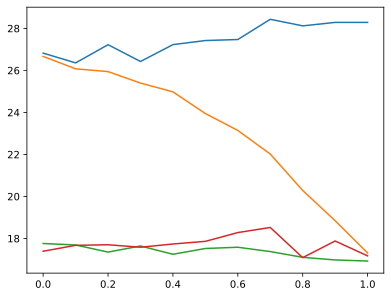

In [132]:
plt.plot(pho, mse_mod1)
plt.plot(pho, mse_mod2)
plt.plot(pho, mse_mod3)
plt.plot(pho, mse_mod4)